# K Nearest Neighbors

KNN is definitely my favorite algorithm out of all that we have learned so far! K-Nearest Neighbors is simple, but strong. It uses the idea of proximity to make predictions about individual data points, and it stands as one of the most popular classifiers in ML today.

KNN can be used for both classification and regression problems, but the main idea remains the same- we choose the k closets training data points from the training data set. So for a new datapoint, KNN chooses these k nearest neighbors, and this datapoint is classified by the plurality of its neighbors. That is, new data points are classified by the "majority" of the label of its neighbors. k is a user-chosen value, and the optimal value of k is subjective to the test. 

A commonly used distance metric is the Euclidian distance, but other distance metrics can be used as well, like Hamming distance for discrete variables. Traditional Euclidian distance is calculated through this equation:

$$
d(p, q) = \sqrt{(p - q)^{T} (p - q)}
$$


### The KNN Algorithm
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
 - 3.1 Calculate the distance between the query example and the current example from the data.
 - 3.2 Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

## Choosing the right value for K
To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

Here are some things to keep in mind:

1. As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.
2. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.
3. In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

### Then how to select the optimal K value?
* There are no pre-defined statistical methods to find the most favorable value of K.
* Initialize a random K value and start computing.
* Choosing a small value of K leads to unstable decision boundaries.
* The substantial K value is better for classification as it leads to smoothening the decision boundaries.
* Derive a plot between error rate and K denoting values in a defined range. Choose the K value having the minimum error rate. 

### Advantages
* The algorithm is simple and easy to implement.
* There’s no need to build a model, tune several parameters, or make additional assumptions.
* The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).


### Disadvantages
* The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.



# Application

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px


# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv(r"C:\Users\faith\inde 577\INDE577\577repo\Supervised Learning\Datasets\First_Year_GPA_for_College_Students_1008_61.csv")



df['SAT'] = df['SATV'] + df['SATM']
print(df['SAT'])
df.columns

high_gpa = df[df['GPA'] >= 3.5]
low_gpa = df[df['GPA'] < 3.5]



0      1450
1      1460
2      1210
3      1440
4      1220
       ... 
214    1390
215    1420
216    1340
217    1300
218    1320
Name: SAT, Length: 219, dtype: int64


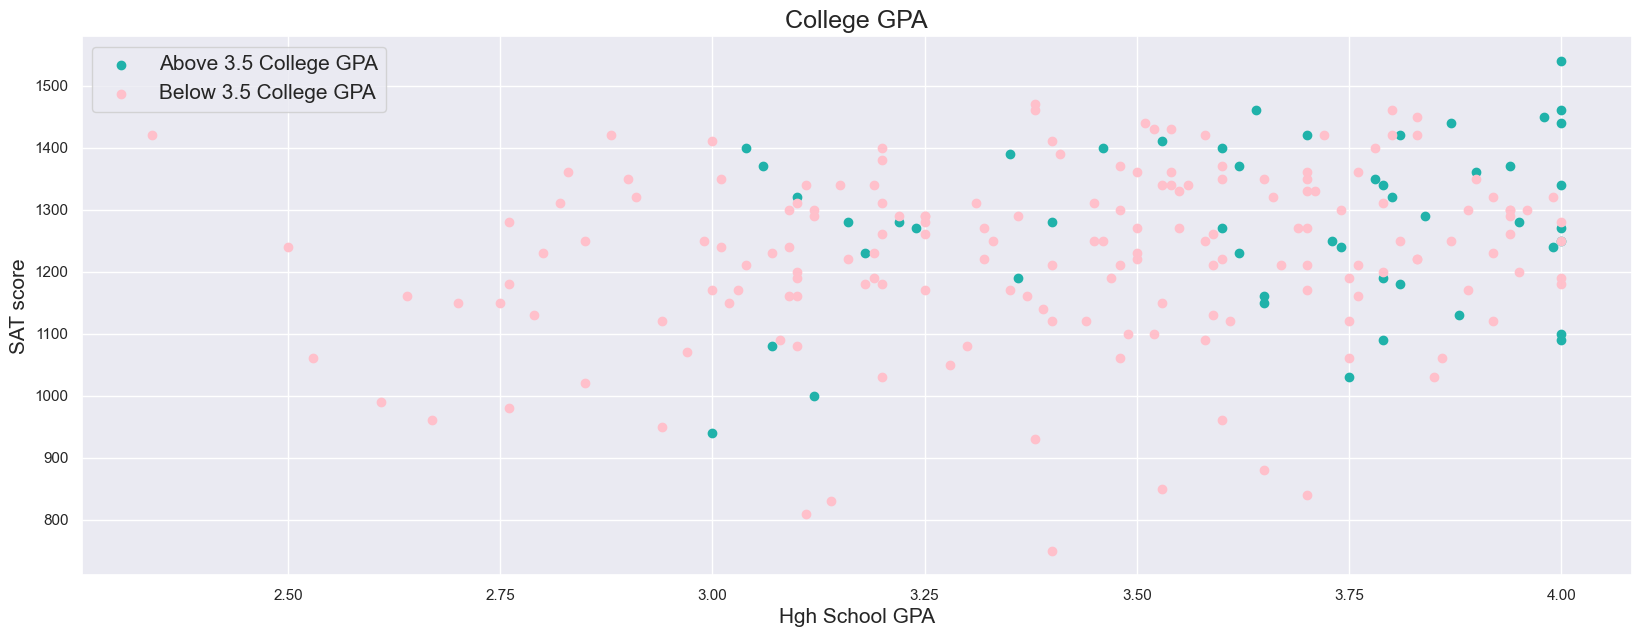

In [182]:
# Plotting
plt.figure(figsize=(20, 7))

plt.scatter(high_gpa['HSGPA'], 
            high_gpa['SAT'], 
            color='lightseagreen', 
            label='Above 3.5 College GPA')

plt.scatter(low_gpa['HSGPA'], 
            low_gpa['SAT'], 
            color='pink', 
            label='Below 3.5 College GPA')

# Labels and title
plt.xlabel("Hgh School GPA", fontsize=15)
plt.ylabel("SAT score", fontsize=15)
plt.legend(fontsize=15)
plt.title("College GPA", fontsize=18)

# Show plot
plt.show()

In [183]:
df = df.dropna()
df.head()

X = df[['HSGPA', 'SAT']]
y= df['college_GPA_label'] = df['GPA'].apply(lambda x: '>=3.5' if x >= 3.5 else '<3.5')

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_test)

     HSGPA   SAT
154   3.00  1410
93    2.94  1120
216   3.15  1340
217   3.09  1300
15    3.55  1270
..     ...   ...
111   3.50  1270
185   3.85  1030
177   3.64  1460
31    2.80  1230
12    3.81  1420

[73 rows x 2 columns]


In [184]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)


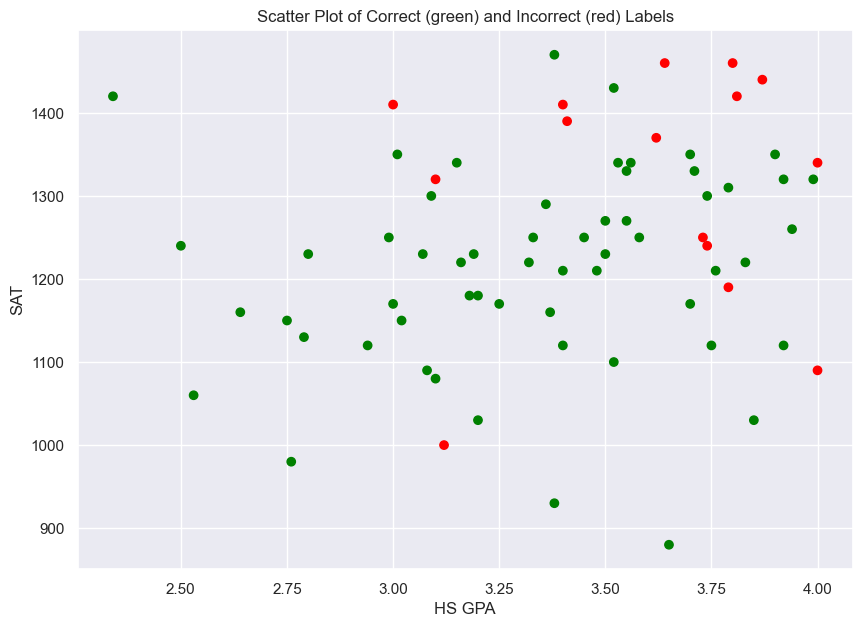

In [185]:
correct= y_pred_test == y_test

colors = np.where(correct, 'green', 'red')



plt.figure(figsize=(10, 7))
plt.scatter(X_test.HSGPA.values, X_test.SAT.values, c= colors)

plt.xlabel('HS GPA')
plt.ylabel('SAT')
plt.title('Scatter Plot of Correct (green) and Incorrect (red) Labels')
plt.show()

In [186]:
# Calculate accuracy
accuracy = accuracy_score(y_pred_test, y_test)

# Print accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7945205479452054


Not bad! I think this less accurate accuracy score and scatter plot are pretty good indicators to the fact that SAT and high school GPA are definitely not everything for predicting college succcess :)

## Using KNN for Regression

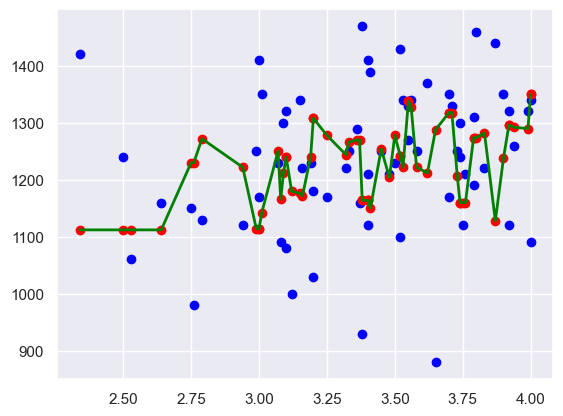

In [187]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming X contains high school GPA and y contains SAT scores
df['SAT'] = df['SATV'] + df['SATM']

Xreg = df['HSGPA'].values.reshape(-1, 1)

yreg= df['SAT']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xreg, yreg, test_size=0.3, random_state=42)

# Initialize the KNN regressor with k=5 (you can adjust k as needed)
knn = KNeighborsRegressor(n_neighbors=5)

# Train the KNN regressor on the training data
knn.fit(X_train, y_train)

# Predict SAT scores for the test data
y_pred = knn.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')

plt.plot(X_test_sorted, y_pred_sorted, color='green', linewidth=2, label='Regression Line')




In [188]:

# Calculate Mean Squared Error (MSE) as a measure of performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 21922.363636363636
